In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import seaborn as sns
from ast import literal_eval

In [82]:
## Data address
url = 'Total data.csv'
url2 = 'https://raw.githubusercontent.com/Erik-Chan/Crude-Oil-Data/master/Data/Cleaned_WTI_WSC.csv'

## load data
data = pd.read_csv(url)
data2 = pd.read_csv(url2)

## transfrom datetime object
data2['DateTime'] = pd.to_datetime(data2['DateTime'])

In [83]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data2.sort_values('DateTime', inplace = True)

In [84]:
data

,beta,W,Objective Value,Sum w
0,0.05,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7.53,131.50
1,0.10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7.53,536.72
2,0.15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7.53,784.81
3,0.20,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.26, 0.05, 0.0, 0.0...",7.53,1018.50
4,0.25,"[1.35, 0.23, 1.18, 1.38, 1.67, 1.93, 1.72, 1.6...",7.53,1264.23
5,0.30,"[3.26, 2.14, 3.09, 3.29, 3.58, 3.84, 3.63, 3.5...",7.53,1605.08
6,0.35,"[5.51, 4.39, 5.34, 5.54, 5.83, 6.09, 5.88, 5.8...",7.53,2091.21
7,0.40,"[7.59, 6.47, 7.42, 7.62, 7.91, 8.17, 7.96, 7.9...",7.53,2603.48
8,0.45,"[8.44, 7.32, 8.27, 8.47, 8.76, 9.02, 8.81, 8.7...",7.53,2839.74
9,0.50,"[9.14, 8.02, 8.97, 9.17, 9.46, 9.72, 9.51, 9.4...",7.53,3059.72


In [85]:
## set datetime as index for plotting 
datetime = data2["DateTime"].reset_index(drop = True)
## convert a list of lists to a list of object lists
WList = [literal_eval(W) for W in data.W]
## create beta indeces
indeces = [r'$\beta = ${}'.format(data.loc[index,"beta"]) for index in data.index.to_list()]
## create a dataframe with beta(s) as columns.
data_2 = pd.DataFrame(data = np.array(WList).transpose(),columns = indeces)
## assign datetime
data_2 = data_2.assign(DateTime = datetime).set_index("DateTime")

In [86]:
## subset data_2 with beta = 0.1,0.3,0.55
data_2.iloc[:,[3,7,11,15]]

,$\beta = $0.2,$\beta = $0.4,$\beta = $0.6,$\beta = $0.8
DateTime,,,,
2018-01-02,0.0,7.59,11.50,14.60
2018-01-03,0.0,6.47,10.38,13.48
2018-01-04,0.0,7.42,11.33,14.43
2018-01-05,0.0,7.62,11.53,14.63
2018-01-08,0.0,7.91,11.82,14.92
...,...,...,...,...
2020-07-27,0.0,0.00,0.00,0.00
2020-07-28,0.0,0.00,0.00,0.00
2020-07-29,0.0,0.00,0.00,0.28


<Figure size 480x360 with 0 Axes>

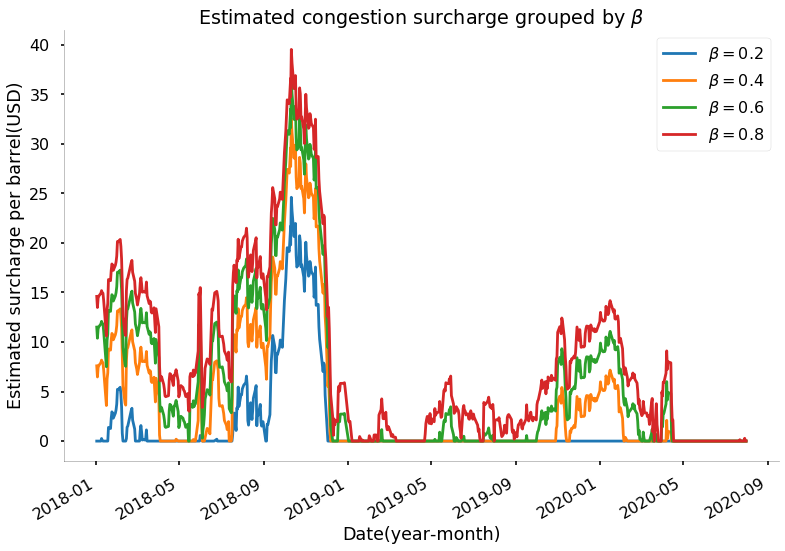

In [87]:
plt.figure(figsize=(8, 6), dpi= 60, facecolor='w', edgecolor='k')
plt.style.use('seaborn-poster')
data_2.iloc[:,[3,7,11,15]].plot()
#plt.plot(data_2.iloc[:,[1,5,10]].index,data_2.iloc[:,5])
#plt.plot(data_2.iloc[:,[1,5,10]].index,data_2.iloc[:,10])
## axis labels
plt.xlabel("Date(year-month)")
plt.ylabel("Estimated surcharge per barrel(USD)")
plt.title(r'Estimated congestion surcharge grouped by $\beta$')
# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   

Text(0.85, 0.95, '$\\beta = 0.80$')

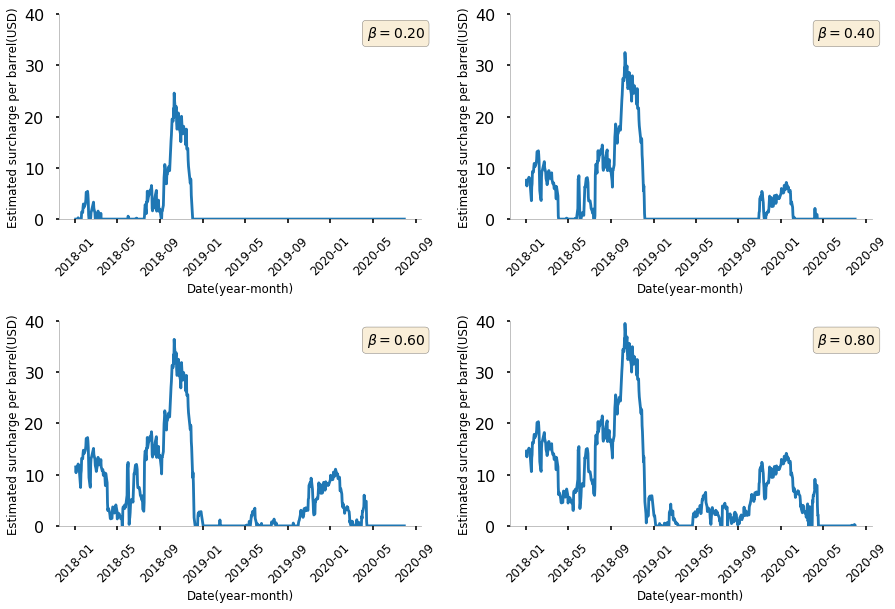

In [178]:
fig,axes = plt.subplots(2,2)
sub_set = data_2.iloc[:,[3,7,11,15]]

axes[0,0].plot(data_2.iloc[:,[3]].index,data_2.iloc[:,[3]])
axes[0,1].plot(data_2.iloc[:,[7]].index,data_2.iloc[:,[7]])
axes[1,0].plot(data_2.iloc[:,[11]].index,data_2.iloc[:,[11]])
axes[1,1].plot(data_2.iloc[:,[15]].index,data_2.iloc[:,[15]])

#plt.rcParams['xtick.labelsize'] = 11.8
for ax in axes.flat:    
    ax.set_xlabel("Date(year-month)",size = 11.8)
    ax.set_ylabel("Estimated surcharge per barrel(USD)",size = 11.8)
    ax.set_ylim(0, 40)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    ax.spines["top"].set_alpha(0.0)    
    ax.spines["bottom"].set_alpha(0.3)
    ax.spines["right"].set_alpha(0.0)    
    ax.spines["left"].set_alpha(0.3)  
    
fig.tight_layout(pad=2.0)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

textstr_1 = r'$\beta = %.2f$' % 0.2
textstr_2 = r'$\beta = %.2f$' % 0.4
textstr_3 = r'$\beta = %.2f$' % 0.6
textstr_4 = r'$\beta = %.2f$' % 0.8
# place a text box in upper left in axes coords
axes[0,0].text(0.85, 0.95, textstr_1, transform=axes[0,0].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
axes[0,1].text(0.85, 0.95, textstr_2, transform=axes[0,1].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
axes[1,0].text(0.85, 0.95, textstr_3, transform=axes[1,0].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
axes[1,1].text(0.85, 0.95, textstr_4, transform=axes[1,1].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


In [88]:
data2.set_index("DateTime",inplace=True)

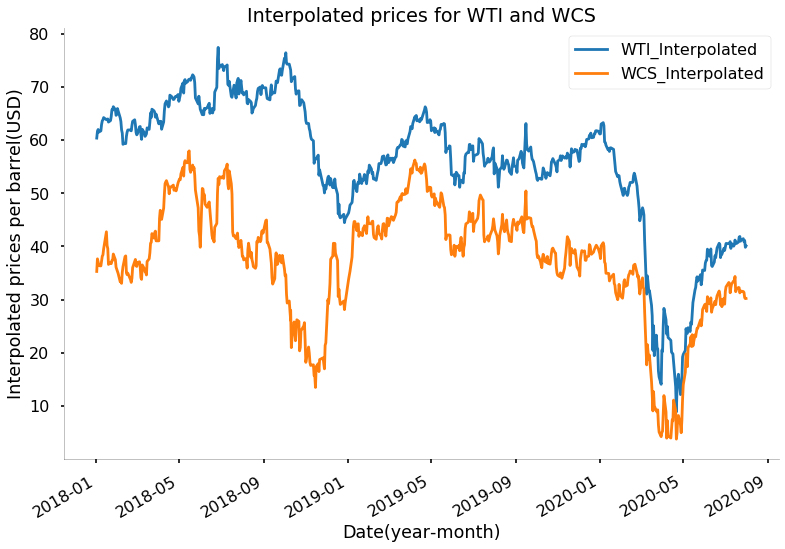

In [90]:
## interpolated prices aginst datetime

data2[["WTI_Interpolated","WCS_Interpolated"]].plot()

## axis labels
plt.xlabel("Date(year-month)")
plt.ylabel("Interpolated prices per barrel(USD)")
plt.title(r'Interpolated prices for WTI and WCS')
# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   

(0, 1)

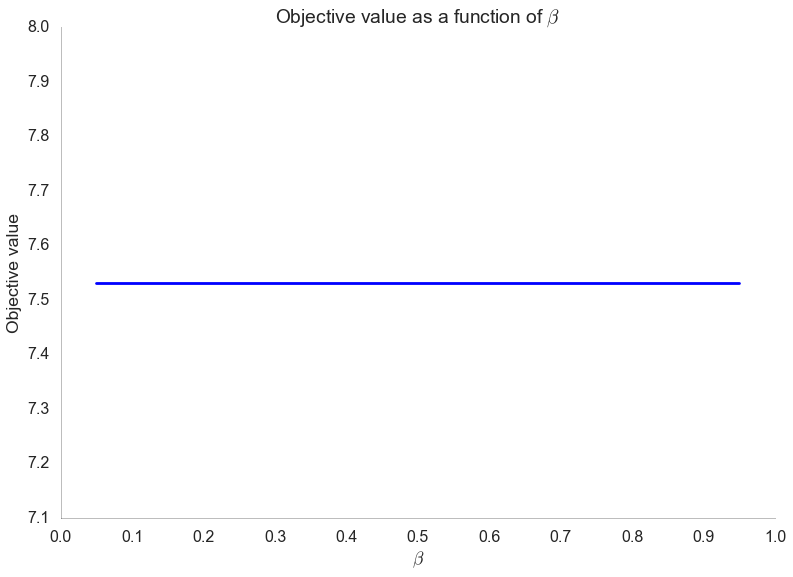

In [395]:
# Objective value against Beta
plt.plot(data['beta'], data['Objective Value'])

## axis labels
plt.xlabel(r'$\beta$')
plt.ylabel("Objective value")
plt.title(r'Objective value as a function of $\beta$')
# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)  

plt.xticks(np.arange(0, 2, 0.1))
plt.xlim(0, 1)

(0, 1)

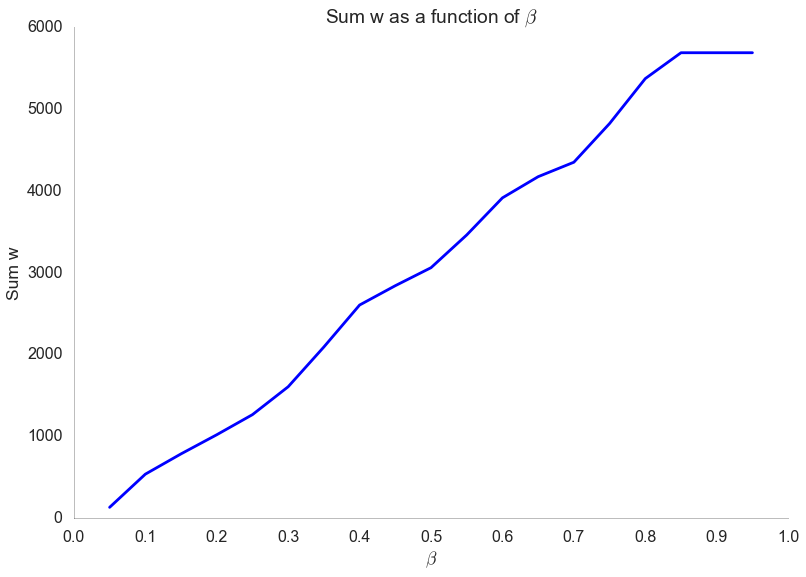

In [396]:
# SumW against Beta
plt.plot(data['beta'], data['Sum w'])

## axis labels
plt.xlabel(r'$\beta$')
plt.ylabel("Sum w")
plt.title(r'Sum w as a function of $\beta$')
# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)  

plt.xticks(np.arange(0, 2, 0.1))
plt.xlim(0, 1)

(0, 1)

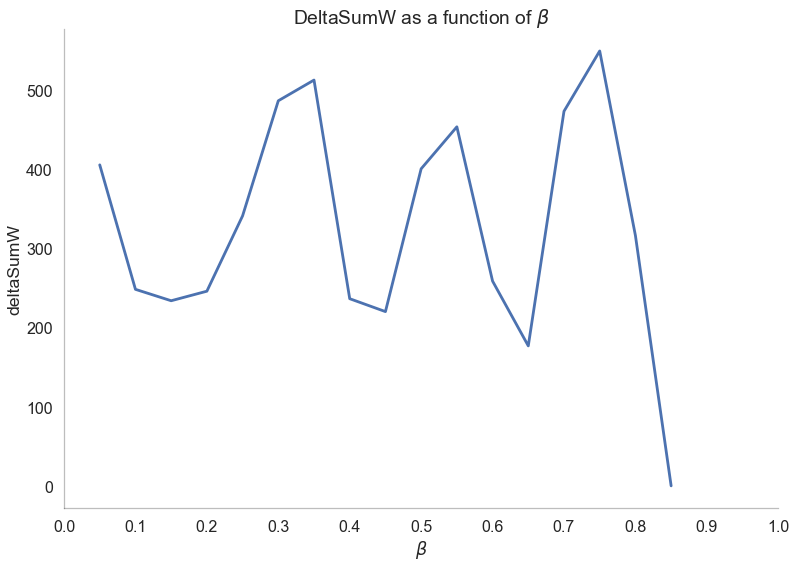

In [365]:
# deltaSumW against Beta
deltaSumW = data['Sum w'][1:-1].values- data['Sum w'][0:-2].values
plt.plot(data['beta'][0:-2], deltaSumW)

## axis labels
plt.xlabel(r'$\beta$')
plt.ylabel("deltaSumW")
plt.title(r'DeltaSumW as a function of $\beta$')
# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)  

plt.xticks(np.arange(0, 2, 0.1))
plt.xlim(0, 1)